# Sonar: mines vs rocks
<em>O presente projeto tem como intuito apresentar o  uso de aprendizagem de Máquina, com um pouco de data viz</em>

Os sonares são instrumentos utilizados inicialmente na localização de submarinos, em que hoje também é usado para navegação, pesquisa áquaticas, pescas, etc. Lembrando um pouco os filmes e desenhos de batalha naval.

<img src="https://media0.giphy.com/media/l2Je1VeTWJKWKtsAw/giphy.gif?cid=ecf05e470ehml759ukd1o223k82e3zjglf3dnnxenw4xrojk&rid=giphy.gif&ct=g">

Sabemos também que as pedras e os minérios são diferentes um do outro, e para fim de pesquisas e experimentos, foram utilizados um sonar que detecta em ângulos diferentes um padrão que identifica se o material é um minério(`Mine` em inglês) ou uma pedra(`Rock` em inglês)

Fonte: [Machine Learning Repository - University of California: 
Connectionist Bench (Sonar, Mines vs. Rocks)](https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29)


# Importar e carregar os dados

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('sonar_all-data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R




São 60 ângulos diferente, provavelmente como a do gif abaixo, e uma `label`/`rótulo` que define o material.

<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fthumbs.gfycat.com%2FPositiveThirdIvorygull-max-1mb.gif&f=1&nofb=1" alt="Sonar">

# Análise exploratória de dados.

In [3]:
df.shape

(208, 61)

Há dado ausente?

In [4]:
df.isna().sum().sum()

0

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [6]:
df[60].value_counts()

M    111
R     97
Name: 60, dtype: int64

In [7]:
mean_angles = df.groupby(60).mean()
mean_angles

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


Definindo Variável para plot, e estruturando a tabela para a visualização.

In [8]:
transposed_angles_by_material = mean_angles.transpose().stack().reset_index()\
                    .rename(columns={"level_0":"index", 60:"label", 0: "angle_mean"})

                    
transposed_angles_by_material

,index,label,angle_mean
0,0,M,0.034989
1,0,R,0.022498
2,1,M,0.045544
3,1,R,0.030303
4,2,M,0.050720
...,...,...,...
115,57,R,0.006677
116,58,M,0.008695
117,58,R,0.007078
118,59,M,0.006930


Visualização de como nossos dados estão organizados e diferenciados um do outro.

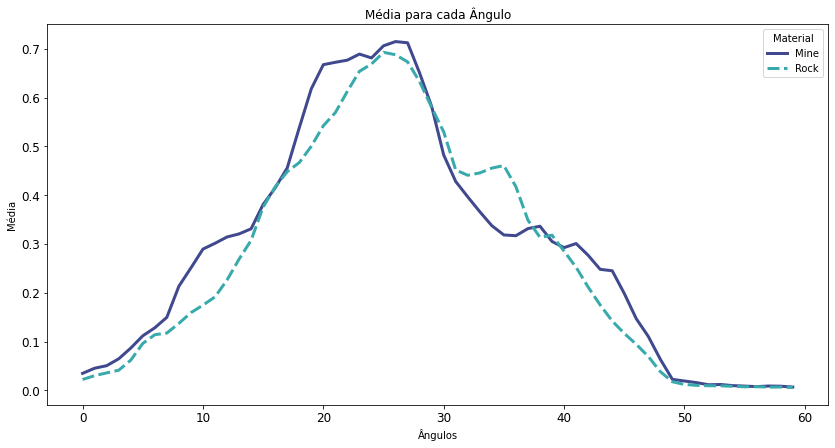

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.lineplot(data=transposed_angles_by_material, x="index", y="angle_mean", 
             hue="label", style="label", palette="mako", linewidth=3)
plt.title("Média para cada Ângulo")
plt.xlabel("Ângulos")
plt.ylabel("Média")
plt.legend(labels=["Mine", "Rock"], title="Material")
plt.tick_params(axis="both", labelsize="larger")

## Treino e Teste Machine Learning

In [10]:
# utilizando nosso dataframe "cru"
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [11]:
print(X.head())
print()
print(y.head())

       0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      50      51      52      53      54      55      56  \
0  0.2111  ...  0.0232  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180   
1  0.2872  ...  0.0125  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140   
2  0.6194  ...  0.0033  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316   
3  0.1264  ...  0.0241  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050   
4  0.4459  ...  0.0156  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072   

       57      58      59  
0  0.0084  0.0090  0.0032  
1  0.0049  0.0052  0.0044  
2  0.016

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=7)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(187, 60) (21, 60) (187,) (21,)


## Treinamento

In [13]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Avaliação do modelo

Precisão do modelo. 

In [14]:
X_train_prediction = model.predict(X_train)
X_test_prediction = model.predict(X_test)

In [15]:
# pontuação do modelo de treinamento 
print("A pontuação para o modelo de treinamento com os dados de treinamento: ")
accuracy_score(y_train, X_train_prediction)

A pontuação para o modelo de treinamento com os dados de treinamento: 


0.8342245989304813

In [16]:
# pontuação do modelo de teste
print("A pontuação para o modelo de treinamento com os dados de teste: ")
accuracy_score(y_test, X_test_prediction)

A pontuação para o modelo de treinamento com os dados de teste: 


0.7619047619047619

Fazendo um <em>Predictive System</em>

In [17]:
def predictive_interface(features, has_print=True):
  input_data_as_np_array = np.asarray(features)

  input_data_reshaped = input_data_as_np_array.reshape(1, -1)
  prediction = model.predict(input_data_reshaped)
  if has_print:
    print(prediction)

    if(prediction[0] == "R"):
      print("Esse material é uma pedra")
    else:
      print("Esse material é um minério/metal")
  return prediction[0]

In [18]:
predictive_interface(X.iloc[5, :])
print("Na linha 22 a label é:", y.iloc[5])

['R']
Esse material é uma pedra
Na linha 22 a label é: R


In [19]:
predictive_interface(X.iloc[22, :])
print("Na linha 22 a label é:", y.iloc[22])

['M']
Esse material é um minério/metal
Na linha 22 a label é: R


In [20]:
predictive_interface(X.iloc[37, :])
print("Na linha 37 a label é:", y.iloc[37])

['R']
Esse material é uma pedra
Na linha 37 a label é: R


In [21]:
# testando com todos os minérios(M)
metal_predicted_correctly = 0
for m in y[y == "M"].index:
  if predictive_interface(X.iloc[m, :], has_print=False) == y[m]:
    metal_predicted_correctly += 1
y_mine_count = y[y == "M"].count()
print(f"Preveu corretamente {metal_predicted_correctly} de { y_mine_count} minérios")
print(f"{((metal_predicted_correctly/y_mine_count)*100).round(2)}% de acerto dos minérios previstos")

Preveu corretamente 97 de 111 minérios
87.39% de acerto dos minérios previstos
